In [1]:
!pip install bangla_stemmer
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=420cca908f4c85f49fdc1f057df31c16c05e95bdd20f9edee98b932bf8c7bcfb
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

In [3]:
df_train = pd.read_excel("/kaggle/input/ubmec-dataset/UBMEC.xlsx")

In [4]:
df_train.head()

,text,classes
0,এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...,joy
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...,surprise
2,"বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক ""কোথাও কেউ...",joy
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...",joy
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...,surprise


In [5]:
df_train.dropna(inplace=True)

In [6]:
df_train['text'] = df_train['text'].astype(str)

In [7]:
longest_string = max(df_train["text"], key=len)
print(len(longest_string))

3648


In [8]:
df_train['classes'].value_counts()

classes
joy         3467
sadness     2683
anger       2480
disgust     2079
surprise    1366
fear        1361
Name: count, dtype: int64

In [9]:
def rem_symbol_punct(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)


def remove_html_and_urls(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text_without_html = soup.get_text()

    # Remove URLs
    text_without_urls = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text_without_html)

    return text_without_urls


def remove_emojis(text):
    # Emoji patterns for different Unicode ranges
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alphanumeric Supplement
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbat symbols
        "\U000024C2-\U0001F251" 
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', text)


#remove noise
def Remove_text(text):
    text = rem_symbol_punct(text)
    text = remove_html_and_urls(text)
    text = remove_emojis(text)
    return text

In [10]:
df_train['text'] = df_train['text'].apply(Remove_text)

In [11]:
longest_string = max(df_train["text"], key=len)
print(len(longest_string))

3419


In [12]:
# Instantiate the NLTKTokenizer
bnltk = NLTKTokenizer()


def remove_stopwords(text):
    # Get the list of Bengali stopwords
    bengali_stopwords = corpus.stopwords
    
    # Tokenize the Bengali text using NLTKTokenizer
    word_tokens = bnltk.word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [token for token in word_tokens if token not in bengali_stopwords]
    
    # Join the filtered tokens back into a text
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text


In [13]:
df_train['text'] = df_train['text'].apply(remove_stopwords)

In [14]:
longest_string = max(df_train["text"], key=len)
print(len(longest_string))

2964


In [15]:
def apply_bangla_stemming(text):
    stmr = stemmer.BanglaStemmer()
    word_tokens = bnltk.word_tokenize(text)
    stemmed_words = [stmr.stem(word) for word in word_tokens]
    return ' '.join(stemmed_words)


In [16]:
# Example usage:
df_train['text'] = df_train['text'].apply(apply_bangla_stemming)


applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
app

In [17]:
df_train['text']

0        নাটক ১৯৯৩ সাল ইউটিউব ছিলোনা ইউটিউব আবিষ্ক ২০০৫...
1               ২০২১ সালে “ কোথা ” আসে রুচির প্রশংসা পারছি
2                 বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক কোথা
3        এত সুন্দর নাটক কখনো সালে দেখ কয়েকব চোখ জল রাখ ...
4        কখনো চিন্তা করিনি জন্ম ৭৮ বছর আগ নাটক দেখবো ভা...
                               ...                        
13431                 Bravo বললে ছোট ৷ হাজারো সাল আজক Hero
13432      ম্যাজিস্ট্রেট স্য প্রথমটুক পড়ে ভাব বেচা পটল তুল
13433    আপনা সত্য পথে অবিচল থাকুন দেশবাসী আপনা সর্বাত্...
13434                          এগা আপনা দিকে তাকা বাংলাদেশ
13435              দুর্নীতি মুক্ত নিশ্চয় চোর মুক্ত বিশ্বাস
Name: text, Length: 13436, dtype: object

In [18]:
longest_string = max(df_train["text"], key=len)
print(len(longest_string))

2792


In [19]:
df_train['text'] 

0        নাটক ১৯৯৩ সাল ইউটিউব ছিলোনা ইউটিউব আবিষ্ক ২০০৫...
1               ২০২১ সালে “ কোথা ” আসে রুচির প্রশংসা পারছি
2                 বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক কোথা
3        এত সুন্দর নাটক কখনো সালে দেখ কয়েকব চোখ জল রাখ ...
4        কখনো চিন্তা করিনি জন্ম ৭৮ বছর আগ নাটক দেখবো ভা...
                               ...                        
13431                 Bravo বললে ছোট ৷ হাজারো সাল আজক Hero
13432      ম্যাজিস্ট্রেট স্য প্রথমটুক পড়ে ভাব বেচা পটল তুল
13433    আপনা সত্য পথে অবিচল থাকুন দেশবাসী আপনা সর্বাত্...
13434                          এগা আপনা দিকে তাকা বাংলাদেশ
13435              দুর্নীতি মুক্ত নিশ্চয় চোর মুক্ত বিশ্বাস
Name: text, Length: 13436, dtype: object

In [20]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_train, test_size=0.2,stratify=df_train['classes'],random_state=42)

In [21]:
X_train  =  train_df['text'].values.tolist()
y_train = train_df['classes'].tolist()

In [22]:
X_test =  test_df['text'].values.tolist()
y_test = test_df['classes'].tolist()

In [23]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 61.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 47.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 13.5 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=6ea72018ff4b5ce61f1115aba16c2379a0a8146e4469d9a55f3383a01d016ca6
  Stored in directory: /roo

In [24]:
import ktrain
from ktrain import text
MODEL_NAME = 'csebuetnlp/banglabert'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [25]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 13
	95percentile : 29
	99percentile : 51


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 13
	95percentile : 30
	99percentile : 54


In [26]:
print(trn)

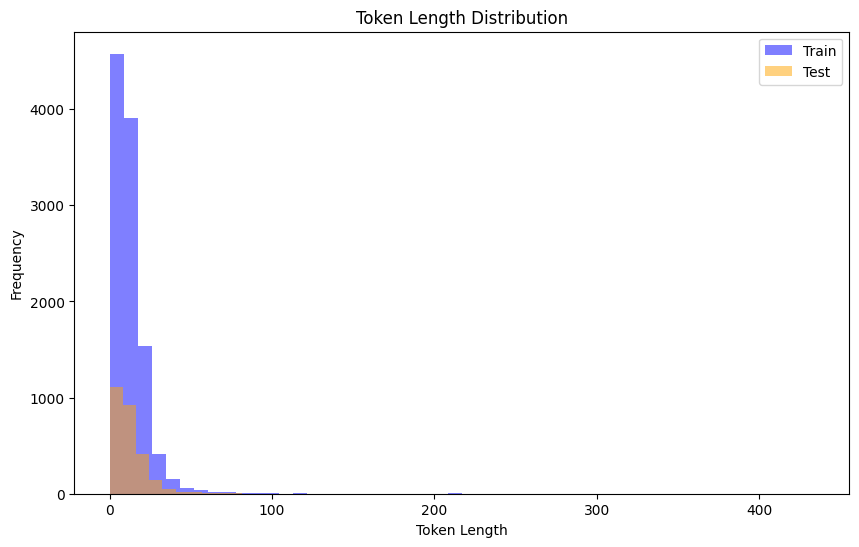

In [27]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [28]:
model = t.get_classifier()

In [29]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [30]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [31]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1344/1344 [==============================] - 842s 607ms/step - loss: 1.5981 - accuracy: 0.3608 - val_loss: 1.3881 - val_accuracy: 0.4598
Epoch 2/10
1344/1344 [==============================] - 810s 603ms/step - loss: 1.2662 - accuracy: 0.5224 - val_loss: 1.2191 - val_accuracy: 0.5402
Epoch 3/10
1344/1344 [==============================] - 810s 603ms/step - loss: 1.0561 - accuracy: 0.6133 - val_loss: 1.1769 - val_accuracy: 0.5699
Epoch 4/10
1344/1344 [==============================] - 810s 603ms/step - loss: 0.8631 - accuracy: 0.6880 - val_loss: 1.2920 - val_accuracy: 0.5528
Epoch 5/10
1344/1344 [==============================] - 810s 603ms/step - loss: 0.6852 - accuracy: 0.7590 - val_loss: 1.3858 - val_accuracy: 0.5632
Epoch 6/10
1344/1344 [==============================] - 810s 603ms/step - loss: 0.5005 - accuracy: 0.8317 - val_loss: 1.4932 - val_accuracy: 0.5696
Epoch 7/10
1344/1344 [===========================

In [32]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [33]:
classes=t.get_classes()

In [34]:
cm = learner.validate(class_names=t.get_classes())

84/84 [==============================] - 61s 682ms/step
              precision    recall  f1-score   support

       anger       0.58      0.53      0.55       496
     disgust       0.41      0.48      0.44       416
        fear       0.56      0.61      0.58       272
         joy       0.78      0.74      0.76       694
     sadness       0.49      0.53      0.51       537
    surprise       0.47      0.39      0.42       273

    accuracy                           0.57      2688
   macro avg       0.55      0.54      0.55      2688
weighted avg       0.57      0.57      0.57      2688



In [35]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [36]:
!zip -r mental.zip /kaggle/output/model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/model

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/model)


In [37]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [38]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [39]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")